# Select relevant extracted wikidump files

In [38]:
import re
import pandas as pd
import os
import time
from tqdm.notebook import tqdm
import unidecode

## Functions

In [39]:
# define functions for extracting metadata
def find_id(string):
    """function to extract id from article"""
    
    id_pattern = 'id=\"\d+\"'
#     id_float = '[0-9]+'
    
    short_string = re.findall(id_pattern, string)[0]
    quotation_sym = '"'
    start = short_string.index(quotation_sym) + len(quotation_sym)
    end = short_string.index(quotation_sym, start + 1)
    actual_id = int(short_string[start:end])

#     actual_id = re.findall(id_float, short_string)
    
    return actual_id
 
def find_url(string):
    """function to extract url from article"""
    
    url_pattern = 'https://en\.wikipedia\.org/[a-zA-z\?=\d]+'
    
    url = re.findall(url_pattern, string)
    
    return url[0]

def find_title(string):
    """function to extract title from article"""
    
    pattern = 'title=\"[^>]+'
    short_string = re.findall(pattern, string)[0]
    
    quotation_sym = '"'
    start = short_string.index(quotation_sym) + len(quotation_sym)
    end = short_string.index(quotation_sym, start + 1)
    title = short_string[start:end]
    
    return title

In [42]:
# function that checks if key words in corpus
def list_in_corpus(list_of_words, text_corpus):
    inclusion = False
    count = 0
    for word in list_of_words:
        if count < 2: # only compare if inclusion condition has not yet been met
            if word in text_corpus: 
                count += 1 # add 1 every time a city name is in the corpus
        else: 
            pass
    if count > 1: 
        inclusion = True 
        # thus the corpus is only marked for inclusion if 
        # at least two cities from the list have been mentioned
    return inclusion

In [43]:
# function to split dumps into flat list

def split_dump(input_dump, split_pattern = "</doc>"):
    """
    splits list of wikidump documents into a flat list of articles
    
        Parameters:
        -----------
            input_dump:    a list of strings
            key_words: list of strings, which should be included in the remaining articles
            split_pattern: str, optional
                string pattern at which the strings 
                should be split into articles. default = '<\doc>'
        
    """
    
    article_list = [
        article for dump 
        in tqdm(input_dump, total = len(input_dump), desc = "Progress") 
        for article in dump.split(split_pattern)]
    
    return article_list

In [44]:
## old list_in_corpus function
# def list_in_corpus_dep(list_of_words, text_corpus):
#     inclusion = False
#     count = 0
#     for word in list_of_words:
#         if word in text_corpus:
#             count += 1 # add 1 every time a city name is in the corpus
#         else: 
#             pass
#     if count > 1: 
#         inclusion = True 
#         # thus the corpus is only marked for inclusion if 
#         # at least two cities from the list have been mentioned
#     return inclusion, count

In [45]:
def process_dump(dump, key_words, message = True): 
    """extracts titles and ids from articles containing key words and returns as a list"""
    
    articles = []
    for article in tqdm(dump, total = len(dump), desc = "Progress"):
        article = unidecode.unidecode(article)
        if (list_in_corpus(cities_ls, article)):
            try: 
                article_id = find_id(article)
                title = find_title(article)
                articles.append((article_id, title, article)) 
            except: 
                pass
        else: 
            pass
            
    if message: 
        print(f"After processing {len(articles)} articles remain, " 
              f"that is {round(((len(articles)/len(dump))*100), 2)}% "
              f"of the total number of articles ({len(dump)}) in this dump.")
    
    return articles

## Load Data

In [46]:
# load articles from dump
which_wiki = "frwiki"
indir = f"/Volumes/NIJMAN/THESIS/{which_wiki}_extracted" # path/to/wikidump/extracted
wikidump = [] # initialize empty list

In [47]:
t0 = time.time()
fp_list = []

for root, dirs, files in os.walk(indir):

    for filename in files:
        if not filename.startswith("."): 
            fp = os.path.join(root, filename)
#             fp_list.append(fp)
            
            with open(fp, 'r') as f: 
                wikidump.append(f.read())

t1 = time.time()

total = t1-t0
print(f"This took {total}s.")

This took 87.24080204963684s.


In [48]:
len(wikidump)

# enwiki length 16498
# frwiki length 5384

5384

## City List

In [49]:
# load cities csv
fp = '../input/List_of_cities_300k.csv' # path to csv with city information

cities = pd.read_csv(fp, sep=';')


In [50]:
# list of all cities
name_col = 'Mua_Fr' # for french 'Mua_Fr'; for english Mua_Eng
cities_ls = [city for city in cities[name_col]]

# split combined citynames 

cities_ls = [city.split('-') for city in cities_ls] # splits Muas that are made up of multiple cities e.g. Essen-Oberhausen
cities_ls = [city_component for city in cities_ls for city_component in city]
cities_ls = [unidecode.unidecode(word) for word in cities_ls] # remove accents


In [51]:
cities_ls

['Paris',
 'Londres',
 'Madrid',
 'Berlin',
 'Milan',
 'Barcelone',
 'Athenes',
 'Rome',
 'Birmingham',
 'Lisbonne',
 'Naples',
 'Katowice',
 'Manchester',
 'Hambourg',
 'Budapest',
 'Bucarest',
 'Varsovie',
 'Stuttgart',
 'Vienne',
 'Munich',
 'Bruxelles',
 'Stockholm',
 'Francfort',
 'Cologne',
 'Copenhague',
 'Valence',
 'Turin',
 'Glasgow',
 'Prague',
 'Lyon',
 'Sofia',
 'Liverpool',
 'Porto',
 'Seville',
 'Dublin',
 'Helsinki',
 'Amsterdam',
 'Rotterdam',
 'Dusseldorf',
 'Essen',
 'Oberhausen',
 'Lille',
 'Lodz',
 'Marseille',
 'Anvers',
 'Bilbao',
 'Newcastle',
 'Cracovie',
 'Bochum',
 'Herne',
 'Thessalonique',
 'Nuremberg',
 'Riga',
 'Duisbourg',
 'Dortmund',
 'Hanovre',
 'Zurich',
 'Oslo',
 'Breme',
 'Dresde',
 'Sheffield',
 'Palerme',
 'Poznan',
 'Gelsenkirchen',
 'Bottrop',
 'Bordeaux',
 'Wroclaw',
 'Goteborg',
 'Gothembourg',
 'Saragosse',
 'Genes',
 'Catane',
 'La Haye',
 'Toulouse',
 'Bristol',
 'Vilnius',
 'Sarrebruck',
 'Malaga',
 'Nantes',
 'Leeds',
 'Nottingham',
 'Fl

***

## Fr Dump

In [52]:
frwikidump = split_dump(wikidump)
len(frwikidump)

Progress:   0%|          | 0/5384 [00:00<?, ?it/s]

4045588

In [53]:
p_frwikidump = process_dump(frwikidump, cities_ls)

Progress:   0%|          | 0/4045588 [00:00<?, ?it/s]

After processing 274639 articles remain, that is 6.79% of the total number of articles (4045588) in this dump.


In [54]:
df = pd.DataFrame(p_frwikidump, columns = ['article_id', 'title', 'text'])
outputfp = '../../../data/frwikidump.csv'
df.to_csv(outputfp, index = False)

<AxesSubplot:ylabel='Frequency'>

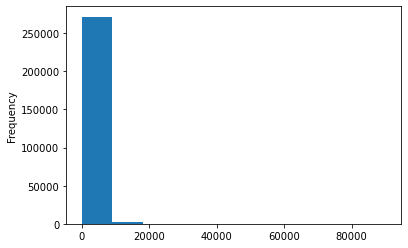

In [56]:
df['length'] = [len(text.split()) for text in df.text]

import matplotlib.pyplot as plt
%matplotlib inline

df['length'].plot.hist()

In [57]:
df.sort_values('length', ascending=True).head(20)

,article_id,title,text,length
127609,4550071,Liege-Rome-Liege,"\n<doc id=""4550071"" url=""https://fr.wikipedia....",5
116675,3934340,Lyon-Turin,"\n<doc id=""3934340"" url=""https://fr.wikipedia....",5
190275,8335484,Paris-Nice-Rome,"\n<doc id=""8335484"" url=""https://fr.wikipedia....",5
90650,2518914,Athenes-Helsinki,"\n<doc id=""2518914"" url=""https://fr.wikipedia....",5
254446,13456161,Paris-Lyon-Mediterranee,"\n<doc id=""13456161"" url=""https://fr.wikipedia...",5
87630,2155965,Paris-Madrid,"\n<doc id=""2155965"" url=""https://fr.wikipedia....",5
158067,6083427,Nice-Genes,"\n<doc id=""6083427"" url=""https://fr.wikipedia....",5
178221,7375911,Paris-Bruxelles,"\n<doc id=""7375911"" url=""https://fr.wikipedia....",5
150120,5625176,Bordeaux-Grenoble,"\n<doc id=""5625176"" url=""https://fr.wikipedia....",5
87683,2168052,Axe Rome-Berlin,"\n<doc id=""2168052"" url=""https://fr.wikipedia....",7


In [58]:
df.text[116675]

'\n<doc id="3934340" url="https://fr.wikipedia.org/wiki?curid=3934340" title="Lyon-Turin">\nLyon-Turin\n\n\n\n'

## En Dump 1

In [12]:
# extract articles from first half of dump
wikidump1 = split_dump(wikidump[:round(len(wikidump)/2)])

Progress:   0%|          | 0/8249 [00:00<?, ?it/s]

In [14]:
wikilength1 = len(wikidump1) #5090764
print(wikilength1)

5090764


In [15]:
p_wikidump1 = process_dump(wikidump1, cities_ls)

Progress:   0%|          | 0/5090764 [00:00<?, ?it/s]

After processing 232260 articles remain, that is 4.56% of the total number of articles (232260) in this dump.


In [17]:
p_wikilength1 = len(p_wikidump1) #232260

print(p_wikilength1)

232260


In [5]:
# save to .csv

df = pd.DataFrame(p_wikidump1, columns = ['article_id', 'title', 'text'])
outputfp = '../../../data/enwikidump1.csv'
df.to_csv(outputfp, index = False)

## En Dump2

In [12]:
# extract articles from second half of dump
wikidump2 = split_dump(wikidump[round(len(wikidump)/2):])

Progress:   0%|          | 0/8249 [00:00<?, ?it/s]

In [13]:
wikilength2 = len(wikidump2) # 11305922
# wikilength2 = nr that it should be

print(wikilength2)

11305922


In [19]:
wikilength1 = 5090764 #len(wikidump1)
wikilength2 = 11305922 #len(wikidump2)
wikilength = wikilength1 + wikilength2

print(f"nr of articles in the enwiki dump is {wikilength}.")

nr of articles in the enwiki dump is 16396686.


In [15]:
p_wikidump2 = process_dump(wikidump2, cities_ls)

Progress:   0%|          | 0/11305922 [01:01<?, ?it/s]

After processing 277634 articles remain, that is 2.46% of the total number of articles (11305922) in this dump.


In [17]:
p_wikilength2 = len(p_wikidump2) # 277634
# p_wikilength2 = 'nr that should actually go here'
print(p_wikilength2)

277634


In [18]:
p_wikilength1 = 232260
p_wikilength2 = 277634

p_wikilength = p_wikilength1 + p_wikilength2 # 509894
print(p_wikilength)

509894


In [21]:
# save to .csv
df = pd.DataFrame(p_wikidump2, columns = ['article_id', 'title', 'text'])
outputfp = f'../../../data/enwikidump2.csv'
df.to_csv(outputfp, index = False)

In [20]:
# dumps = [p_wikidump1, p_wikidump2]
# for i in range(2): 
#     df = pd.DataFrame(dumps[i], columns = ['article_id', 'title', 'text'])
#     outputfp = f'../../../data/enwikidump{i+1}.csv'
#     df.to_csv(outputfp)
    

In [25]:
print(
    f"After processing {p_wikilength} articles remain, " 
    f"that is {round(((p_wikilength/wikilength)*100), 2)}% "
    f"of the total number of articles ({wikilength}) in this dump."
)

After processing 509894 articles remain, that is 3.11% of the total number of articles (16396686) in this dump.


***